# Notes 
1. Outliers on balance_amt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import seaborn as sns

In [2]:
df = pd.read_csv('Train_data.csv')
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  Outcome              751 non-null    object 
 15  call_start           3102 non-null   o

In [4]:
null_val = df.isnull().sum()
null_val

age                       0
job_type                 11
marital_status            0
education_level         113
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           543
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                2351
call_start                0
call_end                  0
car_insurance             0
dtype: int64

In [5]:
df.shape

(3102, 18)

In [6]:
def null_percentage(df):
    for i,name in enumerate(df.columns):
        if null_val[i] > 0:
            print(f'The Percentage of Null Values in {name} is {null_val[i]/df.shape[0]}')

In [7]:
null_percentage(df)

The Percentage of Null Values in job_type is 0.0035460992907801418
The Percentage of Null Values in education_level is 0.036428110896196006
The Percentage of Null Values in communication is 0.17504835589941972
The Percentage of Null Values in Outcome is 0.7578981302385558


<AxesSubplot:xlabel='age', ylabel='job_type'>

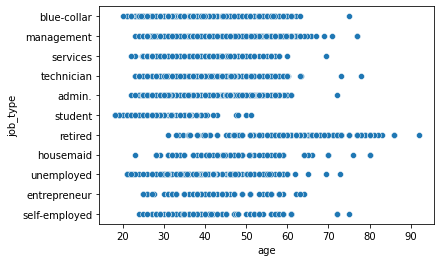

In [8]:
sns.scatterplot(y='job_type',x='age',data=df)

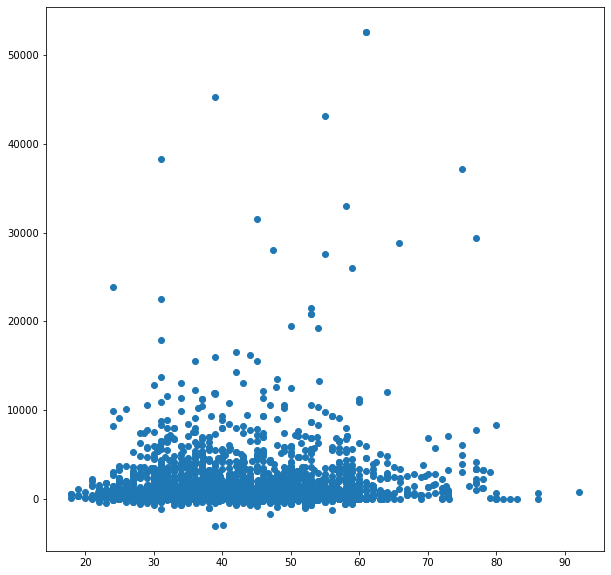

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(df.age,df.balance_amt)

In [10]:
df.car_insurance.value_counts()

1    1760
0    1342
Name: car_insurance, dtype: int64

### Imputing NaN values

In [11]:
df.job_type.value_counts()

management       724
blue-collar      544
technician       526
admin.           346
services         231
retired          193
unemployed       146
student          119
self-employed    106
housemaid         80
entrepreneur      76
Name: job_type, dtype: int64

In [12]:
df.job_type.mode()[0]

'management'

In [13]:
df.job_type = df.job_type.fillna(df.job_type.mode()[0])

In [14]:
df.education_level.value_counts()

secondary    1569
tertiary     1030
primary       390
Name: education_level, dtype: int64

In [15]:
df.head(30)

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1
5,37.000000,management,married,tertiary,0,3737.000000,0,0,cellular,7,jul,1,-1,0,NaN,10:15:03,10:18:47,1
6,30.000000,blue-collar,married,secondary,0,1.000000,0,1,cellular,9,jul,1,-1,0,NaN,10:51:56,10:57:43,0
7,21.000000,student,single,primary,0,1596.000000,0,0,cellular,26,aug,1,93,2,failure,10:10:32,10:12:27,0
8,52.091704,admin.,married,secondary,0,101.453662,0,0,cellular,21,aug,3,-1,0,NaN,16:42:19,16:52:35,1
9,49.000000,technician,married,secondary,0,412.000000,0,0,cellular,19,aug,8,-1,0,NaN,15:33:44,15:55:17,1


In [16]:
df[df['education_level'].isnull()]

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
2,36.0,services,single,NaN,0,281.0,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
75,35.0,technician,single,NaN,0,0.0,0,0,cellular,28,jan,2,-1,0,NaN,12:01:54,12:03:15,0
108,37.0,technician,married,NaN,0,189.0,0,0,cellular,16,jun,2,-1,0,NaN,12:33:44,12:36:26,1
131,28.0,student,single,NaN,0,78.0,0,0,cellular,28,jan,2,-1,0,NaN,15:45:16,15:54:30,0
132,45.0,admin.,married,NaN,0,5511.0,0,0,cellular,2,jul,1,-1,0,NaN,11:37:55,11:42:27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,78.0,retired,married,NaN,0,3208.0,0,0,telephone,20,may,3,-1,0,NaN,16:00:27,16:06:18,1
2996,43.0,technician,divorced,NaN,0,4389.0,0,0,cellular,8,apr,1,-1,0,NaN,17:34:02,17:44:20,1
2999,38.0,technician,married,NaN,0,90.0,1,1,NaN,8,may,2,-1,0,NaN,12:10:56,12:11:16,0
3020,38.0,retired,married,NaN,0,304.0,0,0,cellular,11,may,1,350,5,other,12:52:21,12:53:55,0


In [17]:
df.education_level = df.education_level.fillna(df.job_type.mode()[0])

In [18]:
df.communication.value_counts()

cellular     2397
telephone     162
Name: communication, dtype: int64

In [19]:
df[df['age'] >55 ]

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
15,57.078896,management,married,tertiary,0,259.195700,0,0,cellular,25,aug,4,-1,0,NaN,10:55:33,13:29:25,1
24,58.000000,management,divorced,tertiary,0,0.000000,0,0,telephone,10,jul,7,-1,0,NaN,14:33:32,14:37:19,0
28,73.000000,retired,married,tertiary,0,459.000000,0,0,cellular,17,feb,1,-1,0,NaN,11:34:14,11:38:55,1
36,57.968820,retired,married,secondary,0,-578.611059,0,0,cellular,23,jun,5,-1,0,NaN,09:41:48,17:16:28,1
38,58.000000,retired,married,tertiary,0,2577.000000,1,1,NaN,15,may,3,-1,0,NaN,14:00:28,14:05:18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,73.000000,retired,married,tertiary,0,459.000000,0,0,cellular,17,feb,1,-1,0,NaN,11:34:14,11:38:55,1
3080,77.000000,retired,married,primary,0,3324.000000,0,0,cellular,13,may,1,91,5,success,09:33:30,09:38:19,1
3091,56.533744,blue-collar,married,secondary,0,1600.318017,0,0,cellular,4,jul,2,-1,0,NaN,16:58:19,09:42:53,1
3098,57.000000,admin.,married,secondary,0,4168.000000,1,1,NaN,16,may,1,-1,0,NaN,16:06:03,16:06:50,0


In [20]:
df[df['communication'] == 'telephone' ]

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
24,58.0,management,divorced,tertiary,0,0.0,0,0,telephone,10,jul,7,-1,0,NaN,14:33:32,14:37:19,0
59,40.0,technician,married,secondary,0,1159.0,0,0,telephone,21,oct,1,-1,0,NaN,15:41:56,15:42:15,0
102,66.0,housemaid,married,primary,0,40.0,0,0,telephone,14,oct,2,-1,0,NaN,14:39:25,14:44:15,1
116,47.0,admin.,divorced,secondary,0,555.0,1,1,telephone,17,oct,1,-1,0,NaN,17:08:36,17:16:34,1
144,71.0,retired,married,tertiary,0,653.0,0,0,telephone,3,sep,1,189,1,success,13:40:00,13:47:51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,41.0,self-employed,divorced,tertiary,0,1256.0,0,0,telephone,9,feb,3,-1,0,NaN,14:15:25,14:17:52,0
2998,47.0,entrepreneur,married,tertiary,0,0.0,0,0,telephone,18,nov,2,-1,0,NaN,12:42:47,12:44:30,0
3004,58.0,admin.,divorced,secondary,0,1947.0,0,0,telephone,26,oct,1,-1,0,NaN,14:58:04,15:01:52,1
3039,53.0,management,married,primary,0,798.0,1,0,telephone,2,feb,1,217,2,failure,13:52:05,13:52:50,0


In [21]:
df.communication = df.communication.fillna(df.communication.mode()[0])

In [22]:
df.drop(['Outcome'],inplace=True,axis=1)

In [23]:
df.isnull().sum()

age                    0
job_type               0
marital_status         0
education_level        0
default_or_not         0
balance_amt            0
household_insurance    0
car_loan               0
communication          0
last_contact_day       0
last_contact_month     0
no_of_contacts         0
days_passed            0
prev_attempts          0
call_start             0
call_end               0
car_insurance          0
dtype: int64

### EDA

In [24]:
df.default_or_not.value_counts()

0    3057
1      45
Name: default_or_not, dtype: int64

In [25]:
df.days_passed.unique()

array([ -1, 219, 346,  93,  83, 280,  92,  37, 348, 331, 173, 474, 170,
       122, 167, 455, 154, 251, 143,  64, 106,  28, 144,  98, 109,  10,
        42,  84,  54, 135, 412, 350, 204, 375,  48, 199,  69, 189, 119,
        58, 174, 169, 100, 384, 183, 103, 105,  33, 269, 426, 168, 115,
         8, 316,  53, 181, 197, 138, 104, 171, 202,  85, 367, 178, 258,
        94, 298,  66, 368, 175, 321, 445,  97, 184, 263, 287, 343, 458,
       196, 188, 397, 264, 247, 151,  21,  91,  90,  15,  99, 339,  38,
       289, 320, 180,  55, 164,  34, 126, 532,   7,  27, 311, 203, 270,
       371, 139, 179, 120, 195, 296, 385, 165,  95, 322, 102, 134, 111,
       176, 172, 323, 272, 142, 150, 462, 354,  71, 185, 117, 279, 471,
       182, 369, 334,  63, 360,  77, 114, 214,   6, 238,  96, 127,  12,
        43, 218, 342,  65, 304, 187,  87, 220,  36, 140, 355, 306, 353,
         5,   1, 227, 352,  20, 363, 358, 335, 294,  35,  40, 246,  44,
       359, 842,  89, 177, 190, 160,   4, 549, 262,  86, 295, 38

In [26]:
df.days_passed.replace(to_replace=-1,value=0,inplace = True)

In [27]:
df.days_passed.unique()

array([  0, 219, 346,  93,  83, 280,  92,  37, 348, 331, 173, 474, 170,
       122, 167, 455, 154, 251, 143,  64, 106,  28, 144,  98, 109,  10,
        42,  84,  54, 135, 412, 350, 204, 375,  48, 199,  69, 189, 119,
        58, 174, 169, 100, 384, 183, 103, 105,  33, 269, 426, 168, 115,
         8, 316,  53, 181, 197, 138, 104, 171, 202,  85, 367, 178, 258,
        94, 298,  66, 368, 175, 321, 445,  97, 184, 263, 287, 343, 458,
       196, 188, 397, 264, 247, 151,  21,  91,  90,  15,  99, 339,  38,
       289, 320, 180,  55, 164,  34, 126, 532,   7,  27, 311, 203, 270,
       371, 139, 179, 120, 195, 296, 385, 165,  95, 322, 102, 134, 111,
       176, 172, 323, 272, 142, 150, 462, 354,  71, 185, 117, 279, 471,
       182, 369, 334,  63, 360,  77, 114, 214,   6, 238,  96, 127,  12,
        43, 218, 342,  65, 304, 187,  87, 220,  36, 140, 355, 306, 353,
         5,   1, 227, 352,  20, 363, 358, 335, 294,  35,  40, 246,  44,
       359, 842,  89, 177, 190, 160,   4, 549, 262,  86, 295, 38

In [28]:
start_call = pd.to_datetime(df['call_start'])
end_call = pd.to_datetime(df['call_end'])
end_call

0      2021-04-17 10:24:29
1      2021-04-17 13:59:48
2      2021-04-17 13:27:16
3      2021-04-17 10:21:48
4      2021-04-17 12:27:14
               ...        
3097   2021-04-17 10:08:37
3098   2021-04-17 16:06:50
3099   2021-04-17 13:47:23
3100   2021-04-17 14:03:50
3101   2021-04-17 16:50:36
Name: call_end, Length: 3102, dtype: datetime64[ns]

In [29]:
total_time_call = end_call - start_call
total_time_call

0      0 days 00:02:09
1      0 days 04:53:18
2      0 days 00:08:35
3      0 days 00:12:30
4      0 days 00:14:44
             ...      
3097   0 days 00:00:13
3098   0 days 00:00:47
3099   0 days 00:04:27
3100   0 days 00:09:22
3101   0 days 00:13:01
Length: 3102, dtype: timedelta64[ns]

In [30]:
total_time_call

0      0 days 00:02:09
1      0 days 04:53:18
2      0 days 00:08:35
3      0 days 00:12:30
4      0 days 00:14:44
             ...      
3097   0 days 00:00:13
3098   0 days 00:00:47
3099   0 days 00:04:27
3100   0 days 00:09:22
3101   0 days 00:13:01
Length: 3102, dtype: timedelta64[ns]

In [31]:
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,0,0,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,09:06:30,13:59:48,1
2,36.000000,services,single,management,0,281.000000,1,0,cellular,16,may,1,0,0,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,0,0,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,12:12:30,12:27:14,1


In [32]:
df.nunique()

age                     580
job_type                 11
marital_status            3
education_level           4
default_or_not            2
balance_amt            2004
household_insurance       2
car_loan                  2
communication             2
last_contact_day         31
last_contact_month       12
no_of_contacts           29
days_passed             320
prev_attempts            22
call_start             2309
call_end               2321
car_insurance             2
dtype: int64

In [33]:
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,0,0,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,09:06:30,13:59:48,1
2,36.000000,services,single,management,0,281.000000,1,0,cellular,16,may,1,0,0,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,0,0,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,12:12:30,12:27:14,1


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3102.0,41.325847,11.517698,18.0,32.000000,39.0,49.00,92.0
default_or_not,3102.0,0.014507,0.119587,0.0,0.000000,0.0,0.00,1.0
balance_amt,3102.0,1543.067240,3301.474598,-3058.0,123.821352,589.0,1696.00,52587.0
household_insurance,3102.0,0.465184,0.498867,0.0,0.000000,0.0,1.00,1.0
car_loan,3102.0,0.114442,0.318399,0.0,0.000000,0.0,0.00,1.0
last_contact_day,3102.0,15.353965,8.164255,1.0,8.000000,15.0,21.00,31.0
no_of_contacts,3102.0,2.356867,2.594238,1.0,1.000000,2.0,3.00,43.0
days_passed,3102.0,53.134429,108.881788,0.0,0.000000,0.0,56.75,854.0
prev_attempts,3102.0,0.792392,2.224740,0.0,0.000000,0.0,1.00,58.0
car_insurance,3102.0,0.567376,0.495520,0.0,0.000000,1.0,1.00,1.0


In [35]:
# df.balance_amt = df.balance_amt.quantile(0.5)

In [36]:
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,0,0,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,09:06:30,13:59:48,1
2,36.000000,services,single,management,0,281.000000,1,0,cellular,16,may,1,0,0,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,0,0,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,12:12:30,12:27:14,1


In [37]:
min_thres  = df.balance_amt.quantile(0.2)
min_thres 

55.16581829600004

In [38]:
df[df.balance_amt < min_thres]

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,09:06:30,13:59:48,1
6,30.000000,blue-collar,married,secondary,0,1.000000,0,1,cellular,9,jul,1,0,0,10:51:56,10:57:43,0
10,41.000000,admin.,married,secondary,0,0.000000,0,0,cellular,20,jun,1,0,0,14:59:43,15:01:12,0
16,48.000000,services,married,secondary,0,22.000000,0,0,cellular,2,feb,2,0,0,15:41:48,15:48:57,0
24,58.000000,management,divorced,tertiary,0,0.000000,0,0,telephone,10,jul,7,0,0,14:33:32,14:37:19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,43.000000,management,married,tertiary,0,0.000000,0,0,cellular,31,jul,17,0,0,13:53:28,13:55:15,0
3083,27.000000,services,single,secondary,0,-195.000000,1,0,cellular,18,may,1,0,0,10:51:19,10:57:50,1
3084,30.000000,admin.,divorced,secondary,0,10.000000,1,0,cellular,18,jul,2,0,0,17:18:27,17:29:25,1
3096,30.763109,unemployed,single,tertiary,0,44.782539,1,0,cellular,10,aug,1,0,0,13:05:05,16:40:01,1


In [40]:
df1 = df[(df.balance_amt > min_thres)]
df1.shape

(2481, 17)

In [41]:
df.shape

(3102, 17)

In [42]:
3102-2481

621

In [43]:
df1.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance
0,47.0,blue-collar,married,primary,0,1112.0,1,0,cellular,13,may,1,0,0,10:22:20,10:24:29,0
2,36.0,services,single,management,0,281.0,1,0,cellular,16,may,1,0,0,13:18:41,13:27:16,1
3,32.0,technician,single,secondary,0,540.0,0,1,cellular,29,jan,1,0,0,10:09:18,10:21:48,1
4,30.0,admin.,single,secondary,0,315.0,1,0,cellular,14,may,3,346,4,12:12:30,12:27:14,1
5,37.0,management,married,tertiary,0,3737.0,0,0,cellular,7,jul,1,0,0,10:15:03,10:18:47,1


In [44]:
edu = {
    'primary':0,
    'secondary':1,
    'tertiary':2,
    'management':3
}

In [45]:
df1.education_level = df1.education_level.map(edu)

C:\Users\Saurav\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [46]:
df1.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance
0,47.0,blue-collar,married,0,0,1112.0,1,0,cellular,13,may,1,0,0,10:22:20,10:24:29,0
2,36.0,services,single,3,0,281.0,1,0,cellular,16,may,1,0,0,13:18:41,13:27:16,1
3,32.0,technician,single,1,0,540.0,0,1,cellular,29,jan,1,0,0,10:09:18,10:21:48,1
4,30.0,admin.,single,1,0,315.0,1,0,cellular,14,may,3,346,4,12:12:30,12:27:14,1
5,37.0,management,married,2,0,3737.0,0,0,cellular,7,jul,1,0,0,10:15:03,10:18:47,1


In [47]:
df1.education_level.unique()

array([0, 3, 1, 2], dtype=int64)

In [48]:
df1.job_type.unique()

array(['blue-collar', 'services', 'technician', 'admin.', 'management',
       'student', 'retired', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed'], dtype=object)

In [50]:
len(df1.last_contact_month.unique())

12

In [83]:
df2 = df1[['age','default_or_not','balance_amt','household_insurance','car_loan','car_insurance']]

In [84]:
df2.head()

,age,default_or_not,balance_amt,household_insurance,car_loan,car_insurance
0,47.0,0,1112.0,1,0,0
2,36.0,0,281.0,1,0,1
3,32.0,0,540.0,0,1,1
4,30.0,0,315.0,1,0,1
5,37.0,0,3737.0,0,0,1


In [85]:
df3 = pd.get_dummies(df2)
df3.head()

,age,default_or_not,balance_amt,household_insurance,car_loan,car_insurance
0,47.0,0,1112.0,1,0,0
2,36.0,0,281.0,1,0,1
3,32.0,0,540.0,0,1,1
4,30.0,0,315.0,1,0,1
5,37.0,0,3737.0,0,0,1


### Split The Data

In [86]:
X = df2.drop('car_insurance',axis=1)
y = df2.car_insurance

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [89]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [90]:
model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(X_train.shape[1],))),
model.add(Dense(16,activation='relu')),
model.add(Dense(8,activation='relu')),
model.add(Dense(1,activation='sigmoid'))

In [91]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                192       
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [93]:
history = model.fit(X_train,y_train,epochs=100,batch_size=10,validation_split=0.2)

Epoch 1/100
159/159 [==============================] - 0s 2ms/step - loss: 8.9784 - accuracy: 0.4449 - val_loss: 0.6958 - val_accuracy: 0.5592
Epoch 2/100
159/159 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.6005 - val_loss: 0.6818 - val_accuracy: 0.6096
Epoch 3/100
159/159 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.5816 - val_loss: 0.6754 - val_accuracy: 0.6071
Epoch 4/100
159/159 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5923 - val_loss: 0.6744 - val_accuracy: 0.6071
Epoch 5/100
159/159 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.5936 - val_loss: 0.6725 - val_accuracy: 0.6071
Epoch 6/100
159/159 [==============================] - 0s 1ms/step - loss: 0.6745 - accuracy: 0.5967 - val_loss: 0.6711 - val_accuracy: 0.6045
Epoch 7/100
159/159 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.5967 - val_loss: 0.6791 - val_accuracy: 0.5768